In [2]:
import pandas as pd

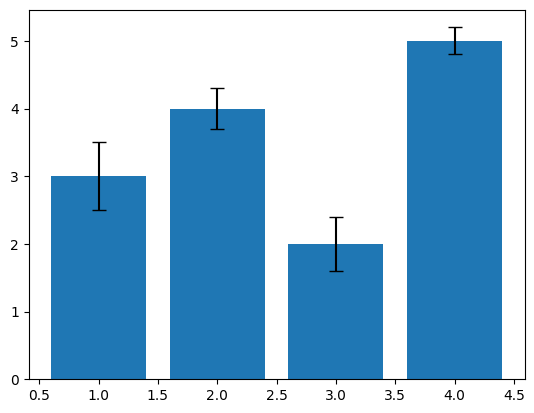

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.array([1, 2, 3, 4])
y = np.array([3, 4, 2, 5])
yerr = np.array([0.5, 0.3, 0.4, 0.2])

# 创建画布和子图
fig, ax = plt.subplots()

# 绘制柱状图和误差线
ax.bar(x, y, yerr=yerr, capsize=5)

# 设置 y 轴范围，将下限设置为 0
ax.set_ylim([0, ax.get_ylim()[1]])

# 显示图形
plt.show()


In [8]:
strain_list = ['Corynebacterium_RNA_seq','BW25113','Bacillus','Yeast_single_cell']
strainName = ['C. glutamicum','B. subtilis','E. coli', 'S. cerevisiae']
analysis_result = '../analysis_result/initial_data'
amino_list = ['Ala','Arg','Asn','Asp','Cys','Gln','Glu','Gly','His','Ile','Leu','Lys','Met','Phe','Pro','Ser','Thr','Trp','Tyr','Val']

Species_Number = len(strain_list)
createVar = locals()

pro = pd.DataFrame()
newindex = 0
for i in range(0, Species_Number):
    amino_composition_norm_onecell_df_outfile='%s/%s/amino_composition_proteome_by_condition_%s.csv'%(analysis_result,strain_list[i],strain_list[i])
    amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
    print(amino_composition_norm_onecell_df)
    for index, row in amino_composition_norm_onecell_df.iterrows():
        for j in range(0,len(amino_list)):
            pro.loc[newindex,'species']=strain_list[i]
            pro.loc[newindex,'value']=row[amino_list[j]]
            pro.loc[newindex,'amino_name']=amino_list[j]
            newindex+=1
pro

                 Gly       Ala       Val       Leu       Ile       Phe  \
ERR1799216  0.048008  0.075327  0.074123  0.098468  0.059567  0.046944   
ERR1799217  0.048022  0.075497  0.074145  0.098462  0.059501  0.046873   
ERR1799218  0.047983  0.075298  0.074030  0.098414  0.059580  0.046971   
ERR1799219  0.048031  0.075454  0.074115  0.098451  0.059540  0.046886   
ERR2401409  0.047900  0.075356  0.074007  0.098781  0.059647  0.047003   
...              ...       ...       ...       ...       ...       ...   
SRR8170164  0.048009  0.075369  0.074040  0.098668  0.059724  0.046995   
SRR8170165  0.047980  0.075329  0.074055  0.098719  0.059727  0.046996   
SRR826828   0.047855  0.075163  0.073872  0.098828  0.059796  0.047197   
SRR826829   0.047785  0.075224  0.073907  0.098810  0.059880  0.047257   
SRR9841648  0.048705  0.076373  0.074663  0.099062  0.059613  0.046663   

                 Trp       Tyr       Asp       Asn       Glu       Lys  \
ERR1799216  0.022198  0.032108  0.063

,species,value,amino_name
0,Corynebacterium_RNA_seq,0.075327,Ala
1,Corynebacterium_RNA_seq,0.076830,Arg
2,Corynebacterium_RNA_seq,0.034847,Asn
3,Corynebacterium_RNA_seq,0.063347,Asp
4,Corynebacterium_RNA_seq,0.006157,Cys
...,...,...,...
21595,Yeast_single_cell,0.060637,Ser
21596,Yeast_single_cell,0.053769,Thr
21597,Yeast_single_cell,0.015134,Trp
21598,Yeast_single_cell,0.044335,Tyr


In [1]:
import pandas as pd

# 创建一个 DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# 获取列名
columns = df.columns

print(columns)


Index(['A', 'B', 'C'], dtype='object')


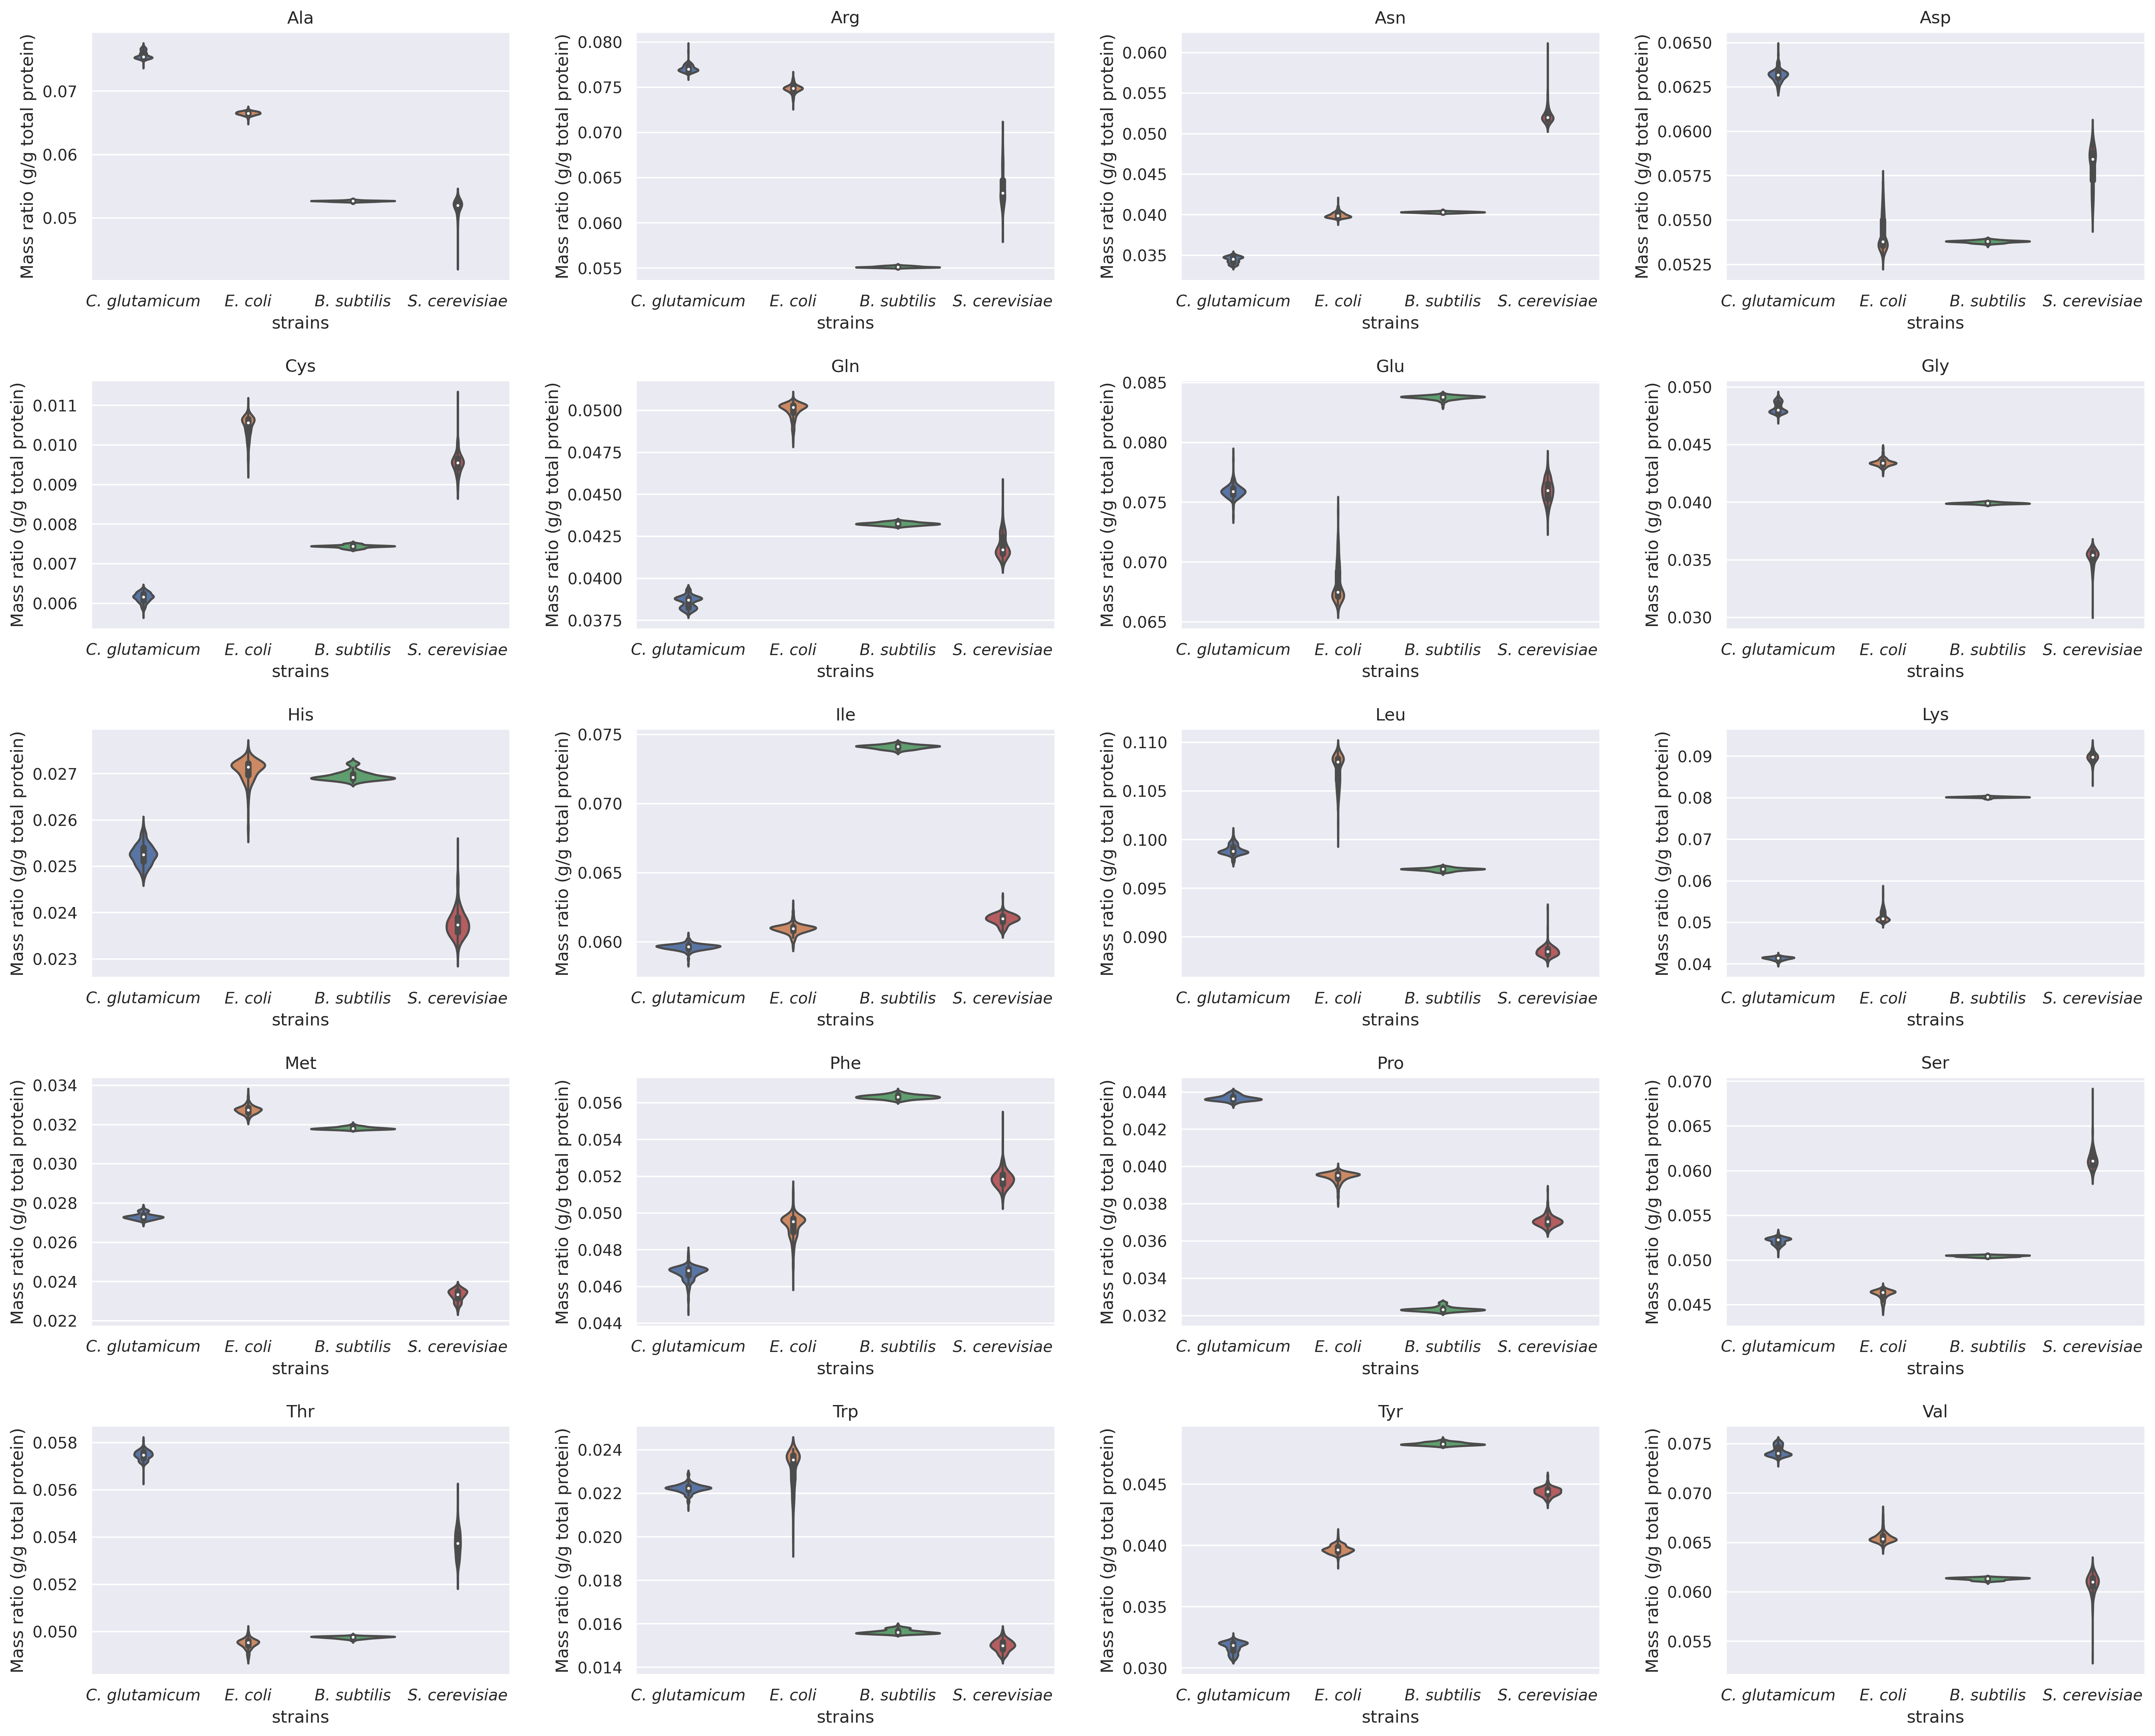

In [49]:
import matplotlib.pyplot as plt

# 创建一个 5 行 4 列的画布，共 20 个子图
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25, 20))

# 调整子图间距
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.4)

# 在每个子图中绘制一个简单的示例图
index = 0
for i in range(5):
    for j in range(4):
        ax = axs[i, j]
        sns.violinplot(x="species", y="value", data=pro[pro['amino_name']==amino_list[index]], ax=ax)
        ax.set_title(amino_list[index])
        ax.set_xticklabels(['C. glutamicum', 'E. coli', 'B. subtilis', 'S. cerevisiae'])# 更改 x 轴刻度
        # 获取当前的 x 轴刻度标签并设置为斜体
        labels = ax.get_xticklabels()
        plt.setp(labels, fontstyle="italic")
        ax.set_xlabel("strains")
        ax.set_ylabel("Mass ratio (g/g total protein)")

        index +=1
# 显示图形
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# def Proteome_Correlation_Analysis(topnum,fig_file,strain,analysis_result):
topnum=760
analysis_result = '../analysis_result/initial_data'
strain = 'Corynebacterium_RNA_seq'

amino_composition_norm_onecell_df_outfile='%s/%s/amino_composition_proteome_by_condition_%s.csv'%(analysis_result,strain,strain)
ori_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
ori_pro=ori_pro.sort_index(axis = 1,ascending = True)
ori_pro_mean=np.mean(ori_pro)

amino_composition_norm_onecell_df_outfile='%s/%s/amino_composition_proteome_top%sprotein_%s.csv'%(analysis_result,strain,topnum,strain)
top_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
top_pro=top_pro.sort_index(axis = 1,ascending = True)
top_pro_mean=np.mean(top_pro) 

amino_composition_norm_onecell_df_outfile='%s/%s/amino_composition_proteome_intersection_protein_%s.csv'%(analysis_result,strain,strain)
exp_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
exp_pro=exp_pro.sort_index(axis = 1,ascending = True)
exp_pro_mean=np.mean(exp_pro)


pro_mean=pd.concat([ori_pro_mean,top_pro_mean,exp_pro_mean],axis=1)
pro_mean.columns=['Total','Mass TOP','Mass and expression']
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)
pro_mean


/home/huangyy/enter/envs/AAComics/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/huangyy/enter/envs/AAComics/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/huangyy/enter/envs/AAComics/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

,Total,Mass TOP,Mass and expression
Ala,0.075723,0.038167,0.038167
Arg,0.077097,0.038891,0.038891
Asn,0.034439,0.017732,0.017732
Asp,0.063171,0.032590,0.032590
Cys,0.006148,0.002563,0.002563
Gln,0.038603,0.019534,0.019534
Glu,0.075925,0.039754,0.039754
Gly,0.048205,0.024661,0.024661
His,0.025257,0.012076,0.012076
Ile,0.059624,0.029123,0.029123


In [13]:
pro_mean = pro_mean[['Total','Mass and expression']]
pro_mean

,Total,Mass and expression
Ala,0.075723,0.038167
Arg,0.077097,0.038891
Asn,0.034439,0.017732
Asp,0.063171,0.032590
Cys,0.006148,0.002563
Gln,0.038603,0.019534
Glu,0.075925,0.039754
Gly,0.048205,0.024661
His,0.025257,0.012076
Ile,0.059624,0.029123


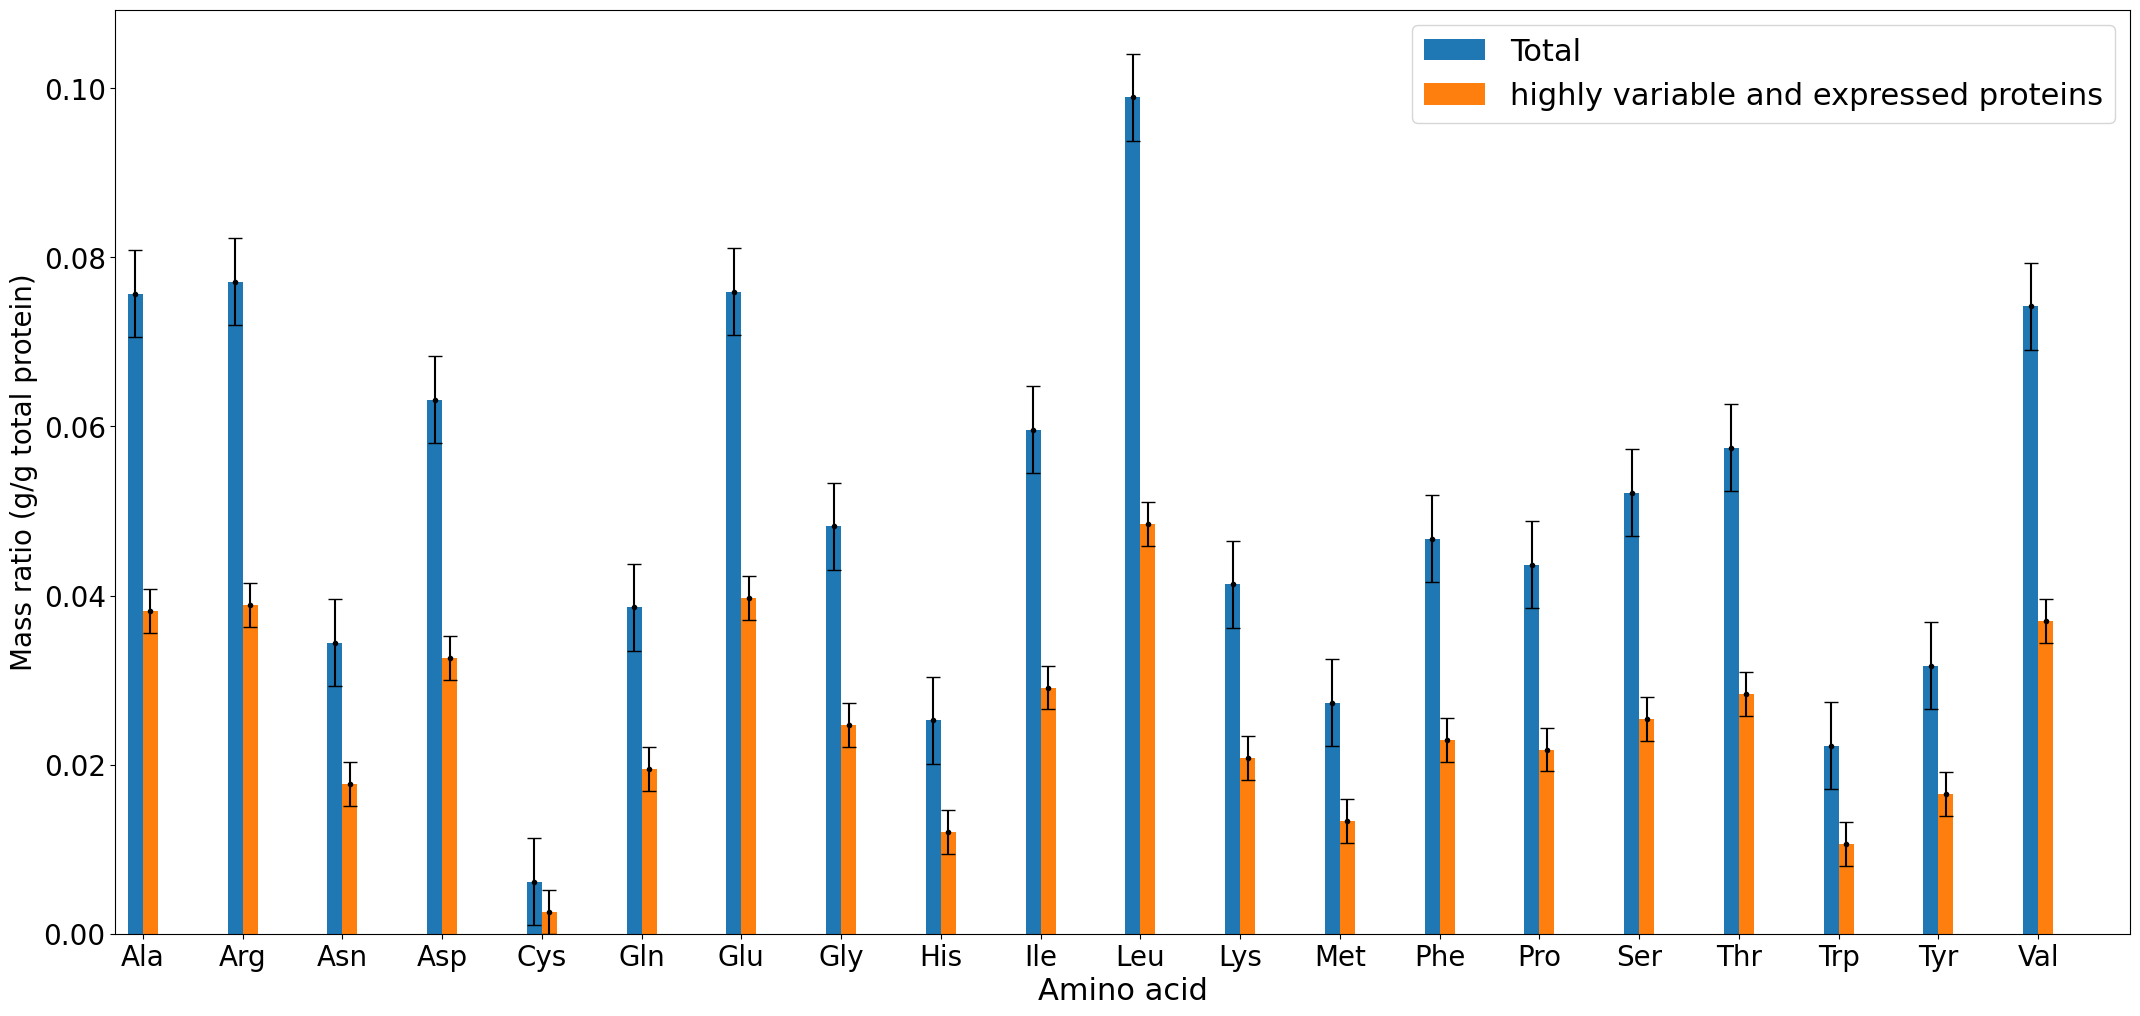

In [28]:
num = 0
width = 0.15
strain_list=['Total','Mass and expression']
strainName=['Total','highly variable and expressed proteins']
Species_Number = len(strain_list)

plt.figure(figsize=(26, 12)) 
plt.tick_params(labelsize=20)
#pro_mean.plot.bar(figsize=(25, 10))
ind = np.arange(20)                # the x locations for the groups
plt.xlim(-.2, 20)
for i in range(0, Species_Number):
    if strain_list[i] != 'Mass TOP':
        num = i*width
        # 计算标准误差
        std_err = np.std(pro_mean[strain_list[i]], ddof=1) / np.sqrt(len(pro_mean[strain_list[i]]))
        # print('std_err:',std_err)
        plt.bar(ind+num,pro_mean[strain_list[i]],width,label = strainName[i])
        plt.errorbar(ind+num,pro_mean[strain_list[i]], yerr=std_err, fmt='.', color='black', capsize=5)
        # plt.set_ylim(bottom=0)

plt.ylim(bottom=0)
plt.xticks(np.arange(20) + 0.5*width, list(pro_mean.index),rotation=0)
# plt.xticks(np.arange(20), list(pro_mean.index),rotation=0)
#plt.bar(data=pro_mean)
#sns.barplot(data=pro_mean.T)
plt.ylabel("Mass ratio (g/g total protein)",fontsize=20)
plt.xlabel("Amino acid", fontsize=22)  # 我们设置横纵坐标的标题。
plt.legend(loc="upper right", fontsize=22)
# plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.xticks(rotation=0)
plt.show()
plt.rcParams['font.style'] ='normal' # 'normal'#

In [ ]:
pro_mean = pd.DataFrame()
for i in range(0, Species_Number):
    amino_composition_norm_onecell_df_outfile='%s/%s/amino_composition_proteome_by_condition_%s.csv'%(analysis_result,strain_list[i],strain_list[i])
    amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
    createVar['twoamino'+str(i+1)]=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    createVar['twoamino'+str(i+1)+'_mean']=np.mean(createVar['twoamino'+str(i+1)])
    
    if i==0:
        pro_mean = pd.DataFrame(createVar['twoamino'+str(i+1)+'_mean'])
    else:
        pro_mean = pd.concat([pro_mean,createVar['twoamino'+str(i+1)+'_mean']],axis=1)
pro_mean.columns=strain_list
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)

pngname='%s/protein_amino_acid_composition_mean.png'%(fig_file)
plt.figure(figsize=(26, 12)) 
plt.tick_params(labelsize=20)
#pro_mean.plot.bar(figsize=(25, 10))
ind = np.arange(20)                # the x locations for the groups
plt.xlim(-.2, 20)
width = 0.15

if strain_list != strainName: # legend中为拉丁名物种的改为斜体
    plt.rcParams['font.style'] ='italic' # 'normal'#

# colors = ['blue', 'red', 'green','darkorange','violet']

num = 0
for i in range(0, Species_Number):
    num = i*width
    # 计算标准误差
    std_err = np.std(pro_mean[strain_list[i]], ddof=1) / np.sqrt(len(pro_mean[strain_list[i]]))
    # print('std_err:',std_err)
    plt.bar(ind+num,pro_mean[strain_list[i]],width,label = strainName[i])
    # plt.errorbar(ind+num,pro_mean[strain_list[i]], yerr=std_err, color='black')
    plt.errorbar(ind+num,pro_mean[strain_list[i]], yerr=std_err, fmt='.', color='black', capsize=5)

plt.xticks(np.arange(20) + 2*width, list(pro_mean.index),rotation=0)
#plt.bar(data=pro_mean)
#sns.barplot(data=pro_mean.T)
plt.ylabel("Mass ratio (g/g total protein)",fontsize=20)
plt.xlabel("Amino acid", fontsize=22)  # 我们设置横纵坐标的标题。
plt.legend(loc="upper right", fontsize=22)
plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.xticks(rotation=0)
plt.show()
plt.rcParams['font.style'] ='normal' # 'normal'#